##       House price prediction

The Data has been extracted from MagicBricks (a website, provides common platform to property buyer and seller ).

There is, some of the attributes couldn't extract. Dataset consists of 12 columns and 1259 rows. 6 of the features are numerical valued and  remainder are categorical.


There are some feature variables such as Area, BHK, Bathroom, Furnishing(furnishing or semi-furnishing or unfurnishing), Locality, parking, status(Ready to move or almost ready), transaction(new property or resale), Type(builder floor or Apartment)

On the basis of feacture variable i want to predict the price of a house

Here are feacture variable and it's data type

* Area and it's data type is float        
* BHK and it's data type is integer             
* Bathroom   and it's data type is integer       
* Furnishing (furnishing or semi-furnishing or unfurnishing) and it's data type is Categorical    
* Locality and it's data type is object            
* Parking  and it's data type is float                 
* Status (Ready to move or almost ready) and it's data type is Categorical            
* Transaction (new property or resale) it's data type is Categorical    
* Type (builder floor or Apartment)  and it's data type is Categorical    
* Per_Sqft and it's data type is float    

On the basis of feature variables, I want to predict the price of a house



* I am going to read the data and related  other information about the dataset<br>
then visualization Data preprocessing

* In the Data visualization part, I will analyze how does target variable changes with the independent features.  I will see the correlation and analyze the correlated column. how if independent features increased and what impact or change occurs on the target variable using histogram, piechart, bar graph, distplot


* In the Data cleaning part, if the outlier is present then I will remove the outlier and add or remove data according to need. I will remove or drop columns that are not correlated.
I will change categorical data into a numeric type, fill value in the empty column and reduce some data.


* I am going to use four models for this project that is Linear Regression, Random Forest, Gradient Boosting Regressor, and XGBoosting Regressor and analysis which models work perfectly in our datasets


In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MagicBricks.csv to MagicBricks (1).csv


In [ ]:
#Reading file
house = pd.read_csv('MagicBricks.csv')
print(house.head())

    Area  BHK  Bathroom  ...   Transaction           Type  Per_Sqft
0  800.0    3       2.0  ...  New_Property  Builder_Floor       NaN
1  750.0    2       2.0  ...  New_Property      Apartment    6667.0
2  950.0    2       2.0  ...        Resale      Apartment    6667.0
3  600.0    2       2.0  ...        Resale  Builder_Floor    6667.0
4  650.0    2       2.0  ...  New_Property  Builder_Floor    6667.0

[5 rows x 11 columns]


Renaming some column names


In [ ]:
# Checking data types and some info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
# Searching for nulls
house.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

There are some missing values in the columns: Bathroom, Furnishing, Parking and Type and per_square

In [ ]:
# searching the coloumn
house.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [ ]:
df = house.copy()  # Making a copy of the data frame
# Now, we can freely edit the copy without loss of original data

A histogram depicts the number of instances (on the vertical axis) with a particular value range (on the horizontal axis). We can plot this one attribute at a time, or we can use the hist() method to plot a histogram for each number attribute throughout the whole dataset.

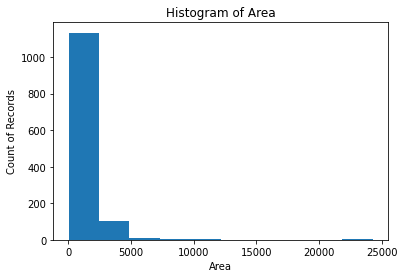

In [ ]:
# plotting Histogram
plt.hist(df["Area"])
plt.xlabel("Area")
plt.ylabel("Count of Records")
plt.title("Histogram of Area")
plt.show()

* The column is right skewed
* maximum area of house is in 9 to 5000sqkm


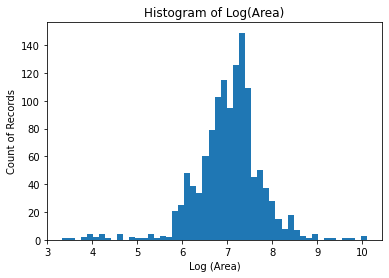

In [ ]:
# Histogram of Log(Area)
plt.hist(np.log(df["Area"]), bins=50)
plt.xlabel("Log (Area)")
plt.ylabel("Count of Records")
plt.title("Histogram of Log(Area)")
plt.show()


There is concentrated closely near the mean of data points when looked at the histogram of log of Area

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


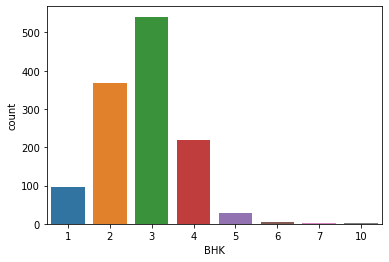

In [ ]:
# Bar plot for BHK
sns.countplot(df["BHK"])
plt.show()



*   There are more 3 BHK houses followed by 2 BHK, 4 BHK and 1 BHK.

*   There are few records available for 5, 6, 7 and 10 BHK as well.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


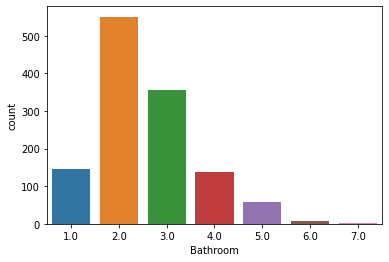

In [ ]:
# bar plot for Bathroom
sns.countplot(df["Bathroom"])
plt.show()

* Most of the houses have 2 bathrooms.
* About 350 of the houses have 3 bathrooms.
* There are about 150 houses which have 1 bathroom or 4 bathrooms.
* Some houses do have more than 4 bathrooms as well.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


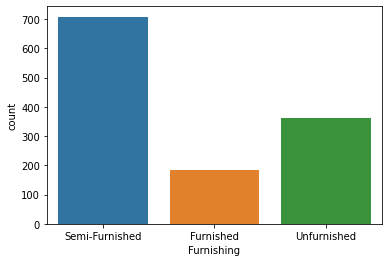

In [ ]:
# Bar plot for Furnishing
sns.countplot(df["Furnishing"])
plt.show()


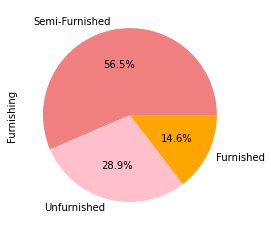

In [ ]:
# Pie chart for Furnishing
round(house['Furnishing'].value_counts()/house.shape[0]*100,3).plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'pink','orange'])

* Majority around 56.5% of the houses are Semi-Furnished
* 28.9% of the houses are UnFurnished
* 14.6% of the houses are Furnished

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


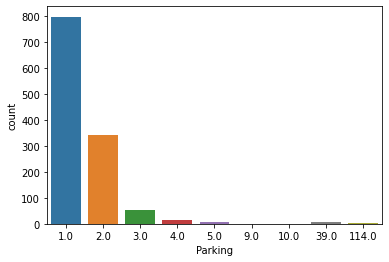

In [ ]:
# Bar plot for parking
sns.countplot(df["Parking"])
plt.show()

* majority of house have only one parking place

In [ ]:
df["Parking"].value_counts()

1.0      796
2.0      341
3.0       54
4.0       16
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: Parking, dtype: int64

* 796 houses have only one parking
* 341 houses have two parking
* 54 houses have three parking
* 7 houses have 39 and 5 parking

* Parking column have some offset values like 39 and 114. We might need to check on the validity of these entries.

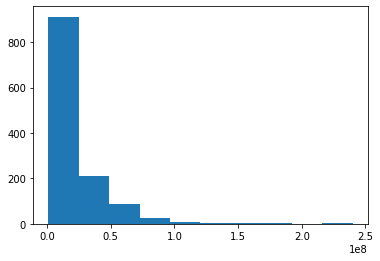

In [ ]:
# histogram for price
plt.hist(df["Price"])
plt.show()

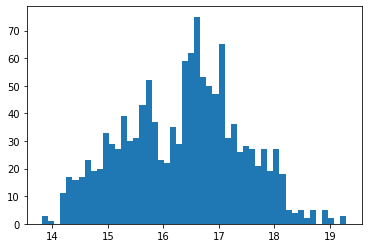

In [ ]:
plt.hist(np.log(df["Price"]), bins=50)
plt.show()

* Target variable "Price" is right skewed as well.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


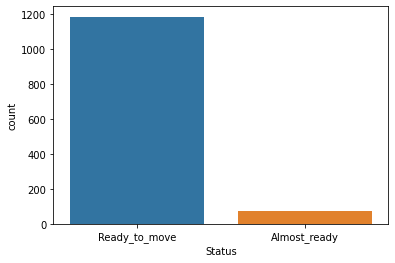

In [ ]:
# bar plot for Status
sns.countplot(df["Status"])
plt.show()

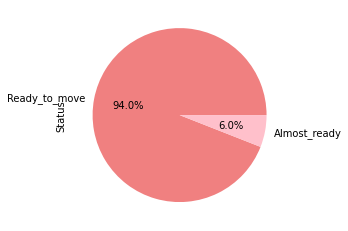

In [ ]:
# pic chart for status
round(house['Status'].value_counts()/house.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'pink'])

* Most of the houses are in ready to move condition.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


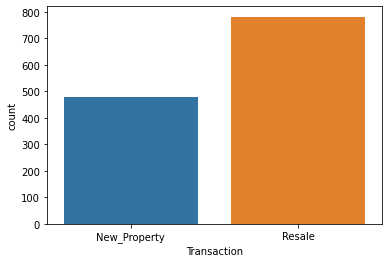

In [ ]:
# Bar plot for Transaction
sns.countplot(df["Transaction"])
plt.show()

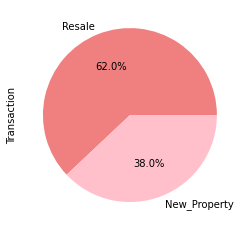

In [ ]:
# Pie chart for Transaction
round(house['Transaction'].value_counts()/house.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'pink'])

* Majority of the houses are for Resale

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


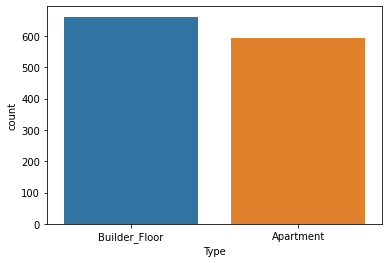

In [ ]:
# Bar plot for Type
sns.countplot(df["Type"])
plt.show()

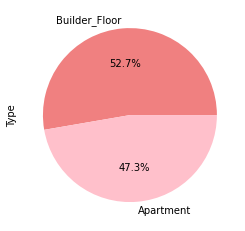

In [ ]:
# pie chart for Type
round(house['Type'].value_counts()/house.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'pink'])

In [ ]:
df["Type"].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

* There seems to almost equal number of house types: Apartment and Builder Floor but Builder Floor is a little more than Apartment

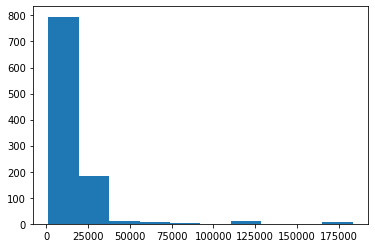

In [ ]:
# histogram for per sqft
plt.hist(df["Per_Sqft"])
plt.show()

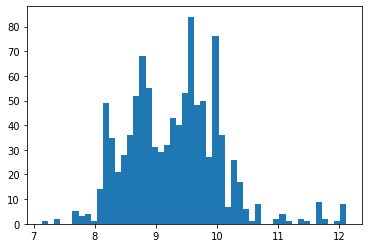

In [ ]:
plt.hist(np.log(df["Per_Sqft"]), bins=50)
plt.show()

* there seems to be outlier in data Per_Sqft

In [ ]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


* Here, i have find what data is saying
* The total number of values in a column is called the count.
  The mean of a column is its mean.
* std is the column's standard deviation, which indicates how spread  the  values are.
* The standard deviation is the square root of the variance, which is the average of the squared deviation from the mean, and is commonly symbolized by (the Greek letter sigma). When a feature's normal distribution is bell-shaped (also called a Gaussian distribution).

* In a given column, min is the lowest number and max is the highest value.
* The corresponding percentiles are shown in the 25 percent, 50 percent, and 75 percent rows: A percentile is a figure below which a certain percentage of observations in a collection of observations fall.

* There might be outliers in the data, specially in the columns: Area, Parking, Price and Per_Sqft because we can see 28 is minimum and 24300 is maximum. there is huge difference

**Now, i going to analysis how does the Target variable change with the independent features**

In [ ]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

At first with Continuous numeric features

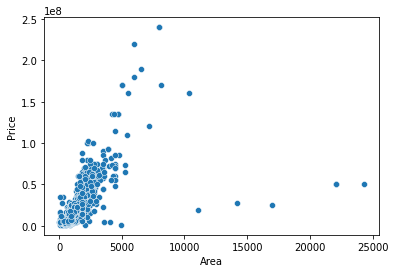

In [ ]:
# scatterplot of Area and price
sns.scatterplot(x=df["Area"], y=df["Price"])
plt.show()

* The house price rises as the Area increases.
* There are some outliers with more than 10000 Area.

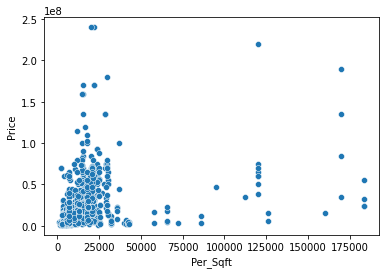

In [ ]:
# scatterplot of Per_Sqft and price
sns.scatterplot(x=df["Per_Sqft"], y=df["Price"])
plt.show()

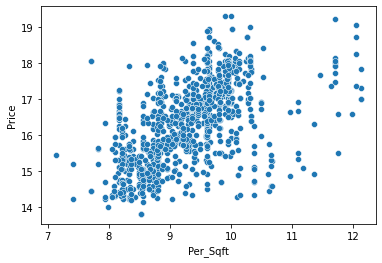

In [ ]:
sns.scatterplot(x=np.log(df["Per_Sqft"]), y=np.log(df["Price"]))
plt.show()

* There is no visible trend in the actual values of the Per_Sqft with Price. However, the their logs show near linear relationship

**Discrete numeric features**

In [ ]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

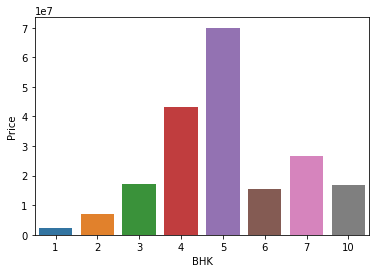

In [ ]:
# comparison between BHK and price
temp = pd.pivot_table(data=df, index="BHK", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

* The houses see a rise in the Price as the number of BHK increase upto 5 and then it sees a sharp decline in the Prices for 6, 7 and 10

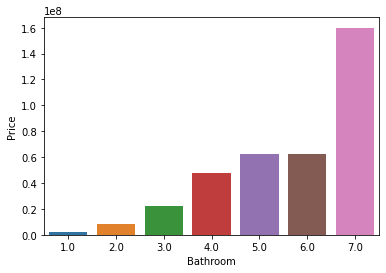

In [ ]:
# comparison between Bathroom and price
temp = pd.pivot_table(data=df, index="Bathroom", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

* The house prices normally increase as the number of bathroom increase.

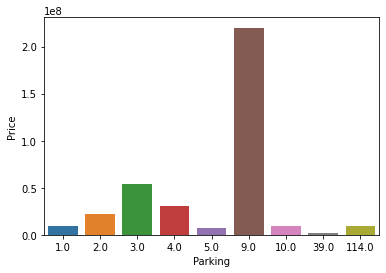

In [ ]:
# comparison between Parking and price
temp = pd.pivot_table(data=df, index="Parking", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

* Upto 3 parking slots, the prices increase and further decreases.
* There is only 1 record with Parking value as 9. This could an outlier.

**Categorical Features**

In [ ]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

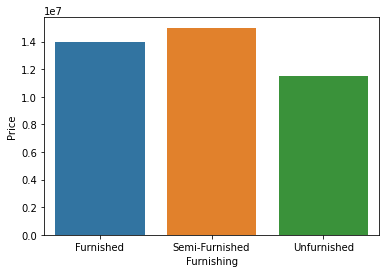

In [ ]:

# comparison between Furnishing and price
temp = pd.pivot_table(data=df, index="Furnishing", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

* There is nothing much change on Furnishing when price increase

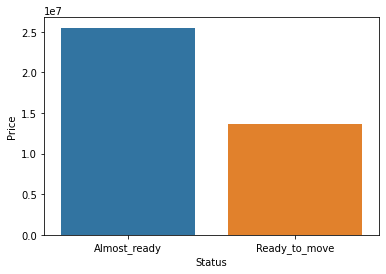

In [ ]:
# comparison between Status and price
temp = pd.pivot_table(data=df, index="Status", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

* The ready to move houses have a higher price

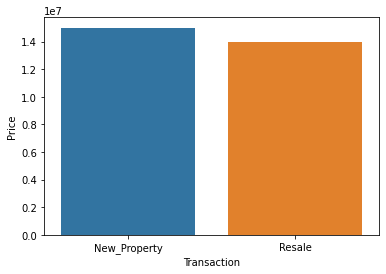

In [ ]:
# comparison between Transaction and price
temp = pd.pivot_table(data=df, index="Transaction", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

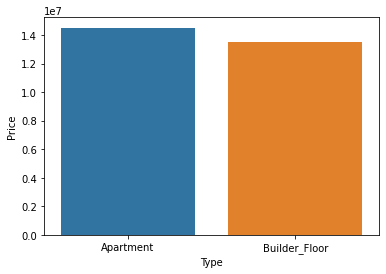

In [ ]:
# comparison between Type and price
temp = pd.pivot_table(data=df, index="Type", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()


* The ready to move houses have a higher price.
* Other than the Status, no other categorical column seems to have any     major impact on the average price of the houses.

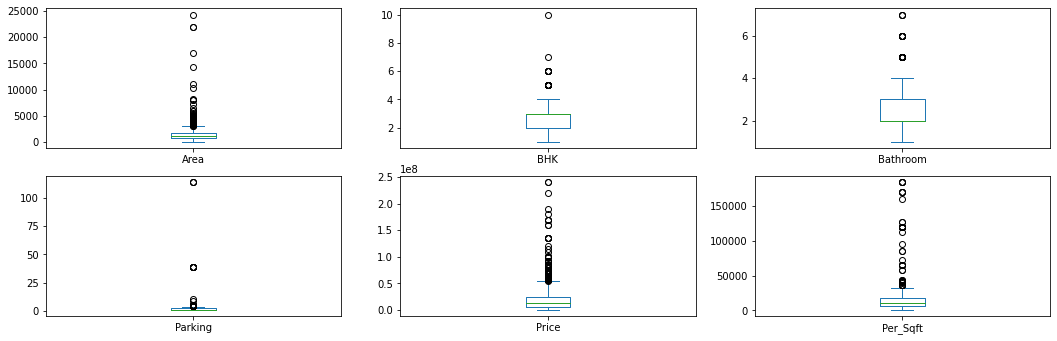

In [ ]:
# Checking outliers
df.plot(kind = "box" , subplots = True , figsize = (18,18) ,  layout = (6,3))
plt.show()

* There is outliers in the columns due to variability in the data as earlier we have seen there is a huge different between min and maxamim value Area and other coloumn

* The standard correlation coefficient between every pair of attributes can be easily computed using the corr() method because the dataset is not too large.

In [ ]:
# for corelation
corr_matrix = house.corr()
print(corr_matrix)

              Area       BHK  Bathroom   Parking     Price  Per_Sqft
Area      1.000000  0.449438  0.535104 -0.009297  0.580836  0.162832
BHK       0.449438  1.000000  0.773267 -0.070707  0.571523  0.181540
Bathroom  0.535104  0.773267  1.000000 -0.032796  0.728108  0.219169
Parking  -0.009297 -0.070707 -0.032796  1.000000 -0.000448  0.001607
Price     0.580836  0.571523  0.728108 -0.000448  1.000000  0.322859
Per_Sqft  0.162832  0.181540  0.219169  0.001607  0.322859  1.000000


The correlation coefficient might be anywhere between –1 and 1. When it's close to 1, it suggests there's a significant positive relationship; for example, when the Area rises, the BHK value rises as well. When the coefficient is close to –1, a strong negative connection is present. There is no linear link if the coefficients are close to zero.

A correlation heatmap uses colored cells, typically in a monochromatic scale to show a 2D correlation matrix(table) between two discreate or events type. it is very important in feacture selection

In [ ]:
# for corelation
corr = df.corr()
corr["Price"].sort_values(ascending=False)

Price       1.000000
Bathroom    0.728108
Area        0.580836
BHK         0.571523
Per_Sqft    0.322859
Parking    -0.000448
Name: Price, dtype: float64

We notice a few key points here, which will be the main basis of our project

1- Price's strongest correlations are with: Area, BHK,Bathroom,per_sqft so we will check for more info about those four specifically.


3- Parking features are weakly correlated.

Here we canot considerd the categorical data we can change into numberical

and see if they are have correlation with price or not

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62e0700490>,
      dtype=object)

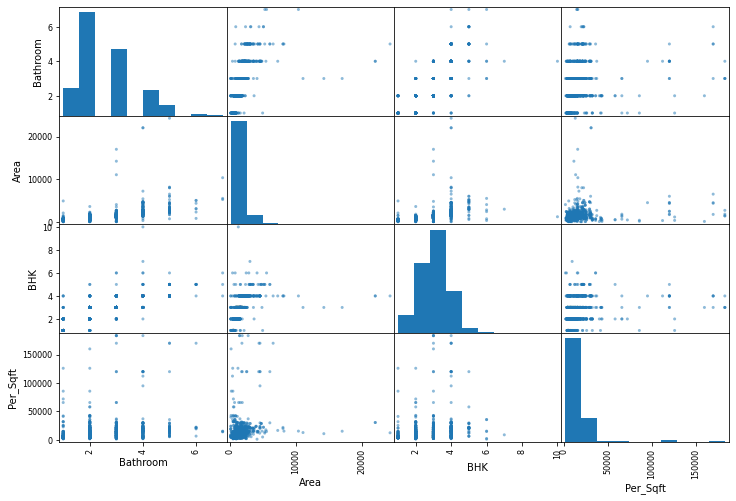

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Bathroom", "Area", "BHK", "Per_Sqft"]
scatter_matrix(house[attributes], figsize = (12,8))

* there is present of outliner in our dataset

# Data cleaning


* In our datasets there is many outlier so we have clean the data by      Changing categorical data to numeric type, fill values in empty coloumn,  droping the coloumn which is actualy not need, reducing some data

* we have to have no missing value in the dataset.

In [ ]:
house['Type'].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

In [ ]:
# Changing to numeric type
df['Type'].replace("Builder_Floor", 0 , inplace = True)
df['Type'].replace("Apartment", 1 , inplace = True)
# Changing to numeric type

In [ ]:
house['Transaction'].value_counts()

Resale          781
New_Property    478
Name: Transaction, dtype: int64

In [ ]:
# Changing to numeric type
df['Transaction'].replace("Resale", 0 , inplace = True)
df['Transaction'].replace("New_Property", 1 , inplace = True)
# Changing to numeric type

In [ ]:
house['Status'].value_counts()

Ready_to_move    1184
Almost_ready       75
Name: Status, dtype: int64

In [ ]:
# Changing to numeric type
df['Status'].replace("Ready_to_move", 1 , inplace = True)
df['Status'].replace("Almost_ready", 0 , inplace = True)

In [ ]:
house['Furnishing'].value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

In [ ]:
# Changing to numeric type
df['Furnishing'].replace("Semi-Furnished", 2 , inplace = True)
df['Furnishing'].replace("Unfurnished", 1 , inplace = True)
df['Furnishing'].replace("Furnished", 0 , inplace = True)

In [ ]:
# for corelation
corr = df.corr()
corr["Price"].sort_values(ascending=False)

Price          1.000000
Bathroom       0.728108
Area           0.580836
BHK            0.571523
Per_Sqft       0.322859
Transaction    0.218234
Furnishing     0.073019
Parking       -0.000448
Type          -0.113003
Status        -0.186129
Name: Price, dtype: float64

* After changing the categorical data into numberical for we can see changes because if the data is int or float, we can get only correlation. if data is categorical, we can not get correlation so that i have change categorical data into numberical

We notice a few key points here,

1- Price's strongest correlations are with: Bathroom, Area, BHK, per_sqft  

* Also postive correlations with Transaction and Furnising
* Negative correlation with Parking, Type and Status

For data cleaning or to deal with imbalanced data we

have more option
* eliminating the coloumn
* to take mean or median and fill in the column
* reduced dataset by removing unnecessary observations

Now, I am going to reduced dataset by removing insignificant observations to get rid of outliers

In [ ]:
# reduced dataset by removing insignificant observations to get rid of outliers
df = house[(house['BHK']<7)&(house['Bathroom']<6)&(house['Parking']<9)&(house['Area']<10000)]
print('Previous dataset shape:', house.shape)
print('New dataset shape:',df.shape)

Previous dataset shape: (1259, 11)
New dataset shape: (1197, 11)


Handling missing values

In [ ]:
# searching for null value
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       1
Locality         0
Parking          0
Price            0
Status           0
Transaction      0
Type             1
Per_Sqft       217
dtype: int64

In [ ]:
# filling the value in Per_sqft
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df = df[~(df['Furnishing'].isnull())]

In [ ]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

**Now there is no missing value in the dataset**.

**Data Pre-processing**

In [ ]:
# dropping locality variable
df = df.drop('Locality', axis=1)

# checking shape of final dataset
df.shape

(1196, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1257
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1196 non-null   float64
 1   BHK          1196 non-null   int64  
 2   Bathroom     1196 non-null   float64
 3   Furnishing   1196 non-null   object 
 4   Parking      1196 non-null   float64
 5   Price        1196 non-null   int64  
 6   Status       1196 non-null   object 
 7   Transaction  1196 non-null   object 
 8   Type         1196 non-null   object 
 9   Per_Sqft     1196 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 102.8+ KB


In [ ]:
cat_cols = ['BHK','Bathroom','Furnishing','Parking','Status','Transaction','Type']
num_cols = ['Area','Price','Per_Sqft']

In [ ]:
# convert data types of categorical variable as string
for cols in cat_cols:
    df[cols] = df[cols].astype(str)

In [ ]:
# creating dummy variables
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,Area,Price,Per_Sqft,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Parking_2.0,Parking_3.0,Parking_4.0,Parking_5.0,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
0,800.0,6500000,8125.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
1,750.0,5000000,6667.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,950.0,15500000,6667.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,600.0,4200000,6667.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1
4,650.0,6200000,6667.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1


**Model Building**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


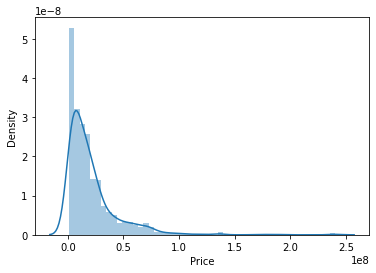

In [ ]:
# Seaborn Distplot represents the overall distribution of price.
sns.distplot(df['Price'])

Represents the overall distribution of price

**Dist plot**

Dist plot help us to check the distribution of the column feacture

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


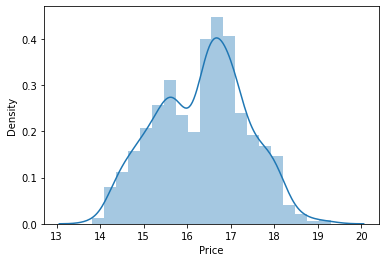

In [ ]:
# converting target variable into log
df['Price'] = np.log(df['Price'])

# plotting target variable dist plot post log transformation
sns.distplot(df['Price'])
plt.show()

* price id incline upto 17 and touch the density upto 0.4 then started decline

# Test and Train Data


In [ ]:
# separating dataset into X and y
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
# dividing data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y.head(3)

0    15.687313
1    15.424948
2    16.556351
Name: Price, dtype: float64

**Feature Scaling**

Primarily, two types of feature scaling methods:

Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this

here, i am using Min-max scaling (Normalization)

In [ ]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (801, 20)
Shape of X_test: (395, 20)


Here I take 801 for train

I  take 395 for test data

#Linear Regression

* Linear regression models are commonly used to fit linear regression models using the least-squares approach. This is achieved by minimizing the sum of squared residuals and determining the values of the parameters described in a linear equation of the 'best-fit line.' Here, I want to predict the price of a house based on the feature variable.

* The equation for the best-fit line is y=ax+b, where y is the output (dependent) variable, x is the input (independent) variable, and a and b are the slope and intercept parameters.


In [ ]:
# importing linear regression package
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fitting train data
lr.fit(X_train, y_train)

#predicting train data
pred_train_lr = lr.predict(X_train)


# predicting test data
pred_test_lr = lr.predict(X_test)


In [ ]:
# y_train.mean()
#pred_train_lr.mean()

**Seleting a performance measure**

* A typical performance for regression problem is the Root mean square
Error(RMSE)

* RMSE is gennerally the prefered performance measure for regression tasks,
so i choose it for this particular problem

* R - squared is defined as (1 - u/v), where u is the residual sum of squares ((y true - y pred) 2).sum() and v is the total sum of squares ((y true - y true.mean()) 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


In [ ]:
# importing evaluation metrices
from sklearn.metrics import r2_score, mean_squared_error
print('Train data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_train_lr, y_train)))
print('R-squared:',r2_score(pred_train_lr,y_train))
print('\n')
print('Test data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_test_lr, y_test)))
print('R-squared:',r2_score(pred_test_lr,y_test))

Train data results
RMSE: 0.4937827941440134
R-squared: 0.6913718589193119


Test data results
RMSE: 0.5486398648809517
R-squared: 0.6794431209155046


In [ ]:
#pred_test_lr = lr.predict(X_test)
#some_labels = y.iloc[:5]
#some_labels



* In Train data we get good score that is 0.49

* In Test data we get 0.67

  we get good score here but we are going to test with other model also

In [ ]:
# evulating the actal and predicted value
df=pd.DataFrame({'Actual':y_train,'Predicted': pred_train_lr })
df.head()

,Actual,Predicted
431,16.157316,16.276438
570,17.296751,16.585013
548,16.993564,16.104248
752,14.669926,14.575917
756,14.220976,14.242107


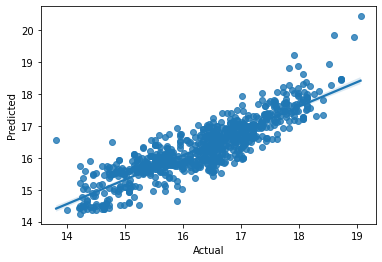

In [ ]:
sns.regplot(x='Actual',y='Predicted',data=df)

we predicted well so many predicted value is around the actual value

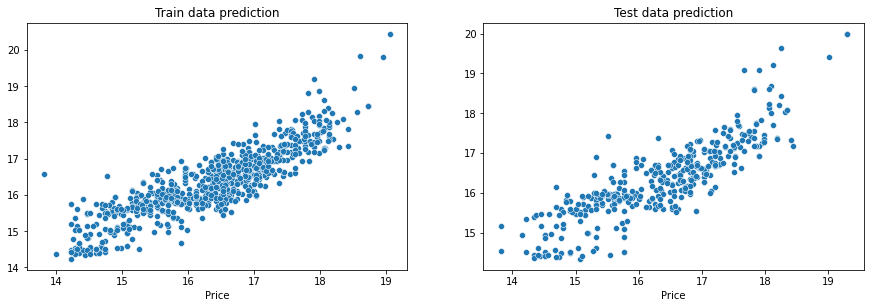

In [ ]:
# plotting result for visual
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Train data prediction')
sns.scatterplot(x=y_train,y=pred_train_lr)
plt.subplot(2,2,2)
plt.title('Test data prediction')
sns.scatterplot(x=y_test,y=pred_test_lr)
plt.show()

Result seems to be good lets see other model predicts

# Random Forest Regressor

* Random forest algorithm operates by creating a large number of decision  trees at training time and outputting the mean/mode of prediction of the individual trees. Random forest is based on the wisdom of crowds, which states that a large  number of uncorrelated models working together as a committee will  perform any of the individual constituent models.

* The reason for this is that the trees help each other by protecting each other from their individual errors. There is no interaction between the individual trees in a random forest. A random forest is an estimator technique that combines the results of several decision trees to produce the best possible result.

* Random Forest outperforms other algorithms in terms of accuracy.

In [ ]:
# importing random forest regressor package
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# fitting training data
rf.fit(X_train,y_train)

# predicting train data
pred_train_rf = rf.predict(X_train)

#predicting test data
pred_test_rf = rf.predict(X_test)


In [ ]:
# evaluating the model
print('Train data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_train_rf, y_train)))
print('R-squared:',r2_score(pred_train_rf,y_train))
print('\n')
print('Test data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_test_rf, y_test)))
print('R-squared:',r2_score(pred_test_rf,y_test))

Train data results
RMSE: 0.14678594479345852
R-squared: 0.9771966370202033


Test data results
RMSE: 0.3953247167486138
R-squared: 0.8466224902906214


* I think we get perfect score at this time, we get 0.145 rmse score

       low rmse mean high accuracy
* we get 0.97 R-squared for train data and 0.85 for test data
now, i will test other model also to get perfect score

In [ ]:
df=pd.DataFrame({'Actual':y_train,'Predicted': pred_train_rf })
df.head()

,Actual,Predicted
431,16.157316,16.077922
570,17.296751,17.201886
548,16.993564,16.559904
752,14.669926,14.661460
756,14.220976,14.395453


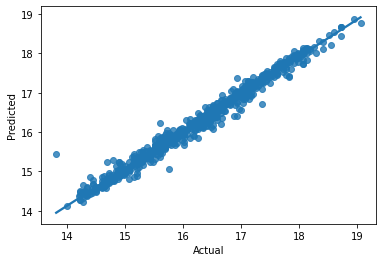

In [ ]:
sns.regplot(x='Actual',y='Predicted',data=df)

we predicted so well

In train data, line goes perfectly also due to less amount of data is use
 in test we donot get perfect result as train data. but our model works
 perfectly

# Gradient Boosting Regressor

* Gradient boosting is one of the boosting strategies that is used to reduce the model's bias error. The difference between the current prediction and the known correct target value is calculated using gradient boosting regression.

* The term "residual" refers to this difference. Gradient boosting regression is then used to train a weak model that maps features to the residual. This residual, which is predicted by a weak model, is added to the existing model input, nudges the model towards the correct target. Repetition of this step improves the model's overall prediction.

* The following are the high-level steps we use to develop Gradient Boosting Regression:

* Choose a week learner.
* Use a model that is additive.
* Define a loss function.
* Reduce the loss function as much as possible.


In [ ]:
# import gradient boosting regressor package
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# fitting training data
gbr.fit(X_train, y_train)

# predicting train data
pred_train_gbr = gbr.predict(X_train)

# predicting test data
pred_test_gbr = gbr.predict(X_test)


In [ ]:
# evaluating the model
print('Train data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_train_gbr, y_train)))
print('R-squared:',r2_score(pred_train_gbr,y_train))
print('\n')
print('Test data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_test_gbr, y_test)))
print('R-squared:',r2_score(pred_test_gbr,y_test))

Train data results
RMSE: 0.26776022461311766
R-squared: 0.9224258474159086


Test data results
RMSE: 0.3881231989497671
R-squared: 0.8494305466955069


* we get 0.267 rmse score for train data and 0.388 rmse for Test data
* we get didnot get low rmse as compare to  random forest

In [ ]:
df=pd.DataFrame({'Actual':y_train,'Predicted': pred_train_gbr })
df.head()

,Actual,Predicted
431,16.157316,16.125594
570,17.296751,17.112400
548,16.993564,16.291593
752,14.669926,14.582781
756,14.220976,14.599989


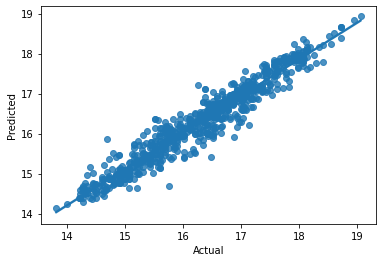

In [ ]:
sns.regplot(x='Actual',y='Predicted',data=df)

* In this model aslo we predicted well but not good as random forest

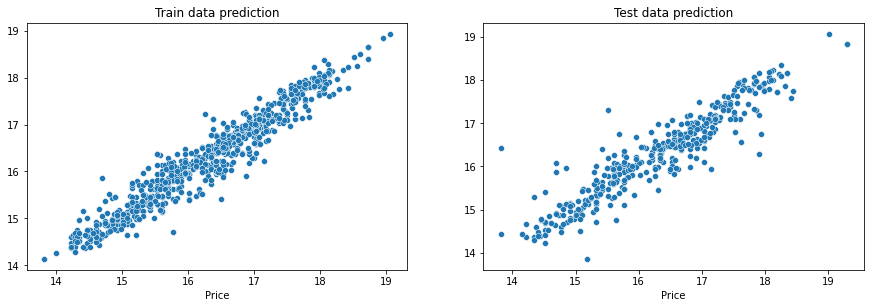

In [ ]:
# plotting results for visual
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Train data prediction')
sns.scatterplot(x=y_train,y=pred_train_gbr)
plt.subplot(2,2,2)
plt.title('Test data prediction')
sns.scatterplot(x=y_test,y=pred_test_gbr)
plt.show()

Gets good score in train and test data but not enough as Random forest

#Xtreme Gradient Boosting Regressor

* XGBoost is a fast gradient boosting solution that can be used for regression predictive modeling.
The weak learners in gradient boosting for regression are regression trees, and each regression tree transfers an input data point to one of its leaves, which carries a continuous score. XGBoost uses a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between predicted and target outputs) with a penalty term for model complexity to minimize a regularized (L1 and L2) objective function (in other words, the regression tree functions).

* The training is repeated iteratively, with new trees being added to predict the residuals or errors of previous trees, which are then integrated with previous trees to provide the final prediction. It's termed gradient boosting because while adding new models, it employs a gradient descent approach to reduce loss.


In [ ]:
# importing xtreme boosting regressor package
from xgboost import XGBRegressor
xgb = XGBRegressor()

# fitting training data
xgb.fit(X_train,y_train)

# predicting train data
pred_train_xgb = xgb.predict(X_train)

# predicting test data
pred_test_xgb = xgb.predict(X_test)

[04:51:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# evaluating the model
print('Train data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_train_xgb, y_train)))
print('R-squared:',r2_score(pred_train_xgb,y_train))
print('\n')
print('Test data results')
print('RMSE:', np.sqrt(mean_squared_error(pred_test_xgb, y_test)))
print('R-squared:',r2_score(pred_test_xgb,y_test))

Train data results
RMSE: 0.28744633036274475
R-squared: 0.9090740522031442


Test data results
RMSE: 0.39607211415880245
R-squared: 0.8431624157028421


In [ ]:
df=pd.DataFrame({'Actual':y_train,'Predicted': pred_train_xgb })
df.head()

,Actual,Predicted
431,16.157316,16.028328
570,17.296751,17.026531
548,16.993564,16.329842
752,14.669926,14.605536
756,14.220976,14.833508


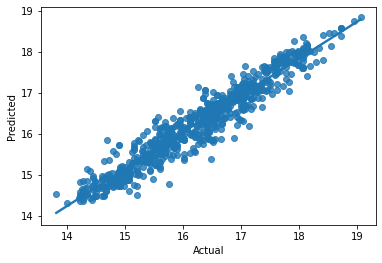

In [ ]:
sns.regplot(x='Actual',y='Predicted',data=df)

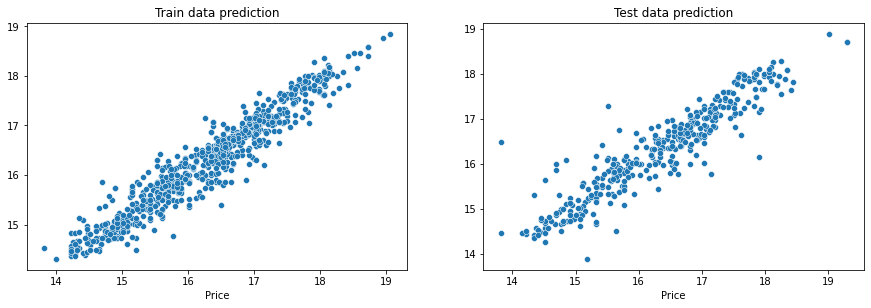

In [ ]:
# plotting results for visual
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Train data prediction')
sns.scatterplot(x=y_train,y=pred_train_xgb)
plt.subplot(2,2,2)
plt.title('Test data prediction')
sns.scatterplot(x=y_test,y=pred_test_xgb)
plt.show()

Scores is not enough as Random forest

In [ ]:
data = [['Linear_Regression',r2_score(pred_train_lr,y_train),r2_score(pred_test_lr,y_test)],
        ['Random_Forest',r2_score(pred_train_rf,y_train),r2_score(pred_test_rf,y_test)],
        ['Gradient_Boosting_Regressor',r2_score(pred_train_gbr,y_train),r2_score(pred_test_gbr,y_test)],
        ['XGBoosting_Regressor',r2_score(pred_train_xgb,y_train),r2_score(pred_test_xgb,y_test)]]
result = pd.DataFrame(data, columns=['algo','train_score','test_score'])
result

,algo,train_score,test_score
0,Linear_Regression,0.691372,0.679443
1,Random_Forest,0.977197,0.846622
2,Gradient_Boosting_Regressor,0.922426,0.849431
3,XGBoosting_Regressor,0.909074,0.843162


* Out of these four model Random_Forest works perfectly for our data

* In Random_Forest, we get 0.97 for train data and 0.84 for test data

# conclusion

* I get know the important feacture variable which is used to predict the price of house

* I get 97% accuracy on both train and 84 on test data

* I have used four model for this project that is Linear Regression, Random Forest, Gradient_Boosting_Regressor and XGBoosting_Regressor

* Out of Linear Regression, Random Forest, Gradient_Boosting_Regressor and XGBoosting_Regressor Random Forest work perfectly on our datasets.